### Proyecto - Análisis exploratorio

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
proyecto_dataset = pd.read_csv("../data/raw/ObesityDataSet_raw_and_data_sinthetic.csv", delimiter=';')
proyecto_dataset.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,NaN,1.62,64.0,no,no,2.0,NaN,no,no,2.0,yes,NaN,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,NaN,1.80,87.0,Frequently,no,3.0,NaN,no,no,2.0,no,NaN,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Columnas por tipo de dato

In [10]:
def get_variables_scale(proyecto_dataset):
    categoricas = [col for col in proyecto_dataset.columns if proyecto_dataset[col].dtype == 'object']
    continuas = [col for col in proyecto_dataset.columns if proyecto_dataset[col].dtype in ['float64','int64'] and len(proyecto_dataset[col].unique()) > 30]
    discretas = [col for col in proyecto_dataset.columns if proyecto_dataset[col].dtype in ['float64','int64'] and len(proyecto_dataset[col].unique()) <= 30]
    return categoricas, continuas, discretas

In [11]:
cat, cont, disct = get_variables_scale(proyecto_dataset)

In [12]:
# Variables continuas
cont

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [13]:
# variables discretas
disct

[]

In [14]:
#Variables categóricas
cat

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

#### Variables categóricas

In [15]:
col_categorica = cat

for col in col_categorica:
    unique_values_counts = proyecto_dataset[col].value_counts().reset_index()
    unique_values_counts.columns = [f'Categoría {col}', 'Count']
    print(f'Valores en variable: {col}')
    print(unique_values_counts)
    print('\n')



Valores en variable: Gender
  Categoría Gender  Count
0             Male    916
1           Female    912


Valores en variable: CALC
  Categoría CALC  Count
0      Sometimes   1401
1             no    639
2     Frequently     70
3         Always      1


Valores en variable: FAVC
  Categoría FAVC  Count
0            yes   1812
1             no    238


Valores en variable: SCC
  Categoría SCC  Count
0            no   2015
1           yes     96


Valores en variable: SMOKE
  Categoría SMOKE  Count
0              no   2067
1             yes     44


Valores en variable: family_history_with_overweight
  Categoría family_history_with_overweight  Count
0                                      yes   1726
1                                       no    385


Valores en variable: CAEC
  Categoría CAEC  Count
0      Sometimes   1765
1     Frequently    242
2         Always     53
3             no     51


Valores en variable: MTRANS
        Categoría MTRANS  Count
0  Public_Transportation   1495


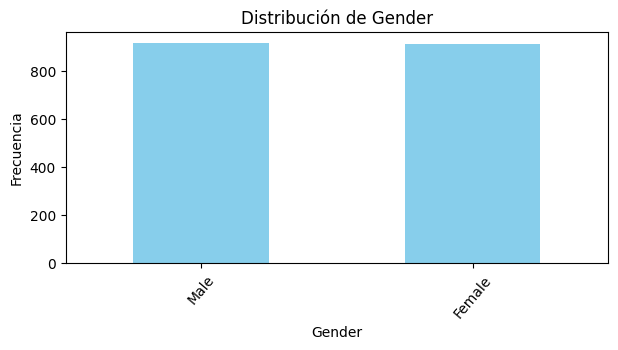

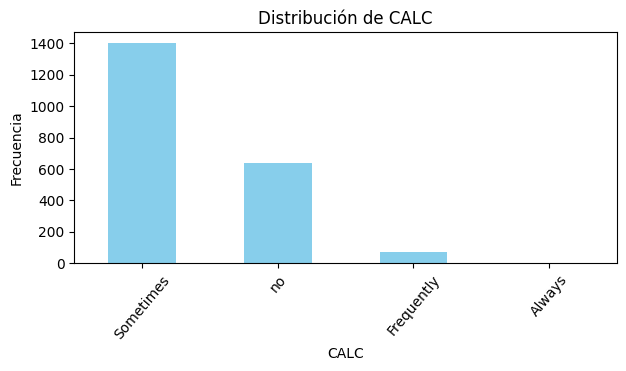

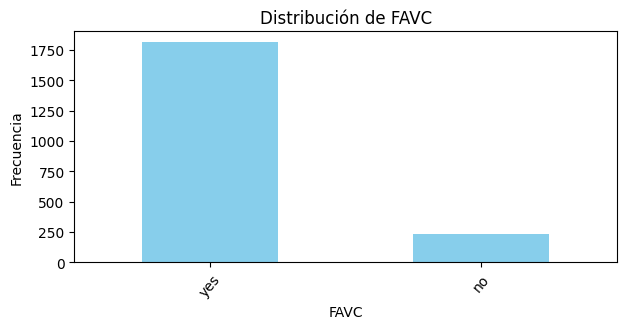

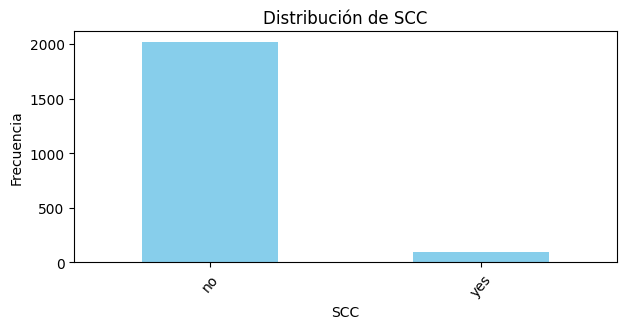

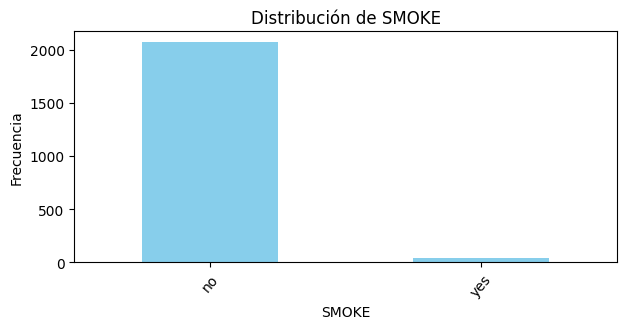

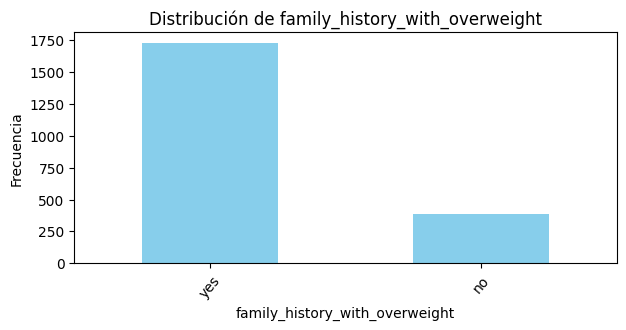

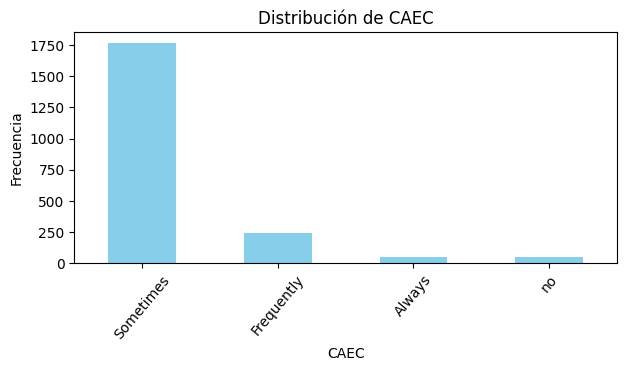

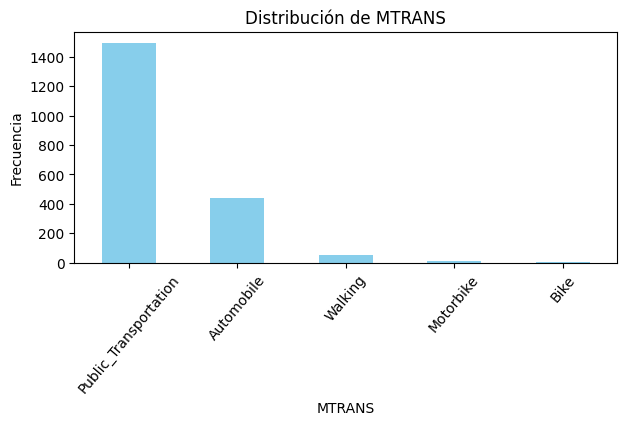

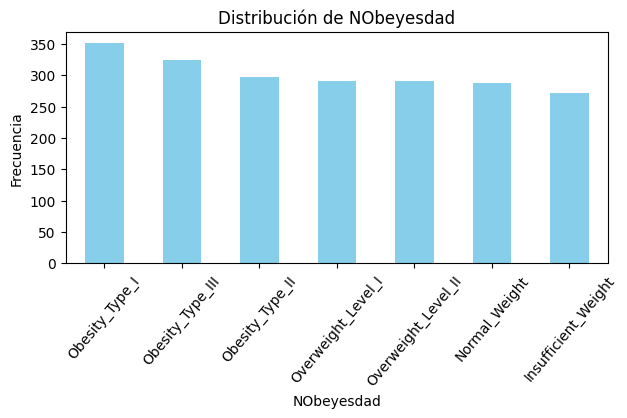

In [16]:
for col in col_categorica:
    #Frecuencia de cada categoría en la columna
    counts = proyecto_dataset[col].value_counts()
    plt.figure(figsize=(7, 3))
    counts.plot(kind='bar', color='skyblue')
    
    # Título y etiquetas de los ejes
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=50) 
    
    plt.show()

#### Variables numericas

In [17]:
col_numeric = cont

proyecto_dataset[col_numeric].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2005.000000,2111.000000,2005.000000,2111.000000,1828.000000,2111.000000,1828.000000,2111.000000
mean,24.342430,1.701677,86.471125,2.419043,2.684451,2.008011,1.003579,0.657866
std,6.378287,0.093305,26.173396,0.533927,0.780643,0.612953,0.859599,0.608927
min,14.000000,1.450000,39.101805,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.948140,1.630000,65.363941,2.000000,2.673486,1.584812,0.112418,0.000000
50%,22.804818,1.700499,82.636162,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.108190,3.000000,3.000000,2.477420,1.666534,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


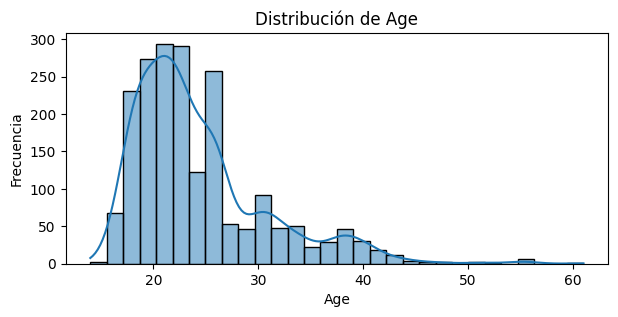

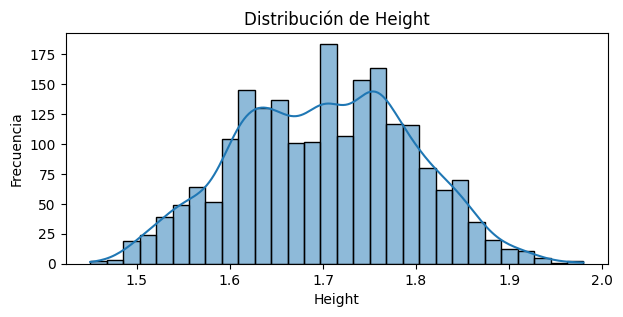

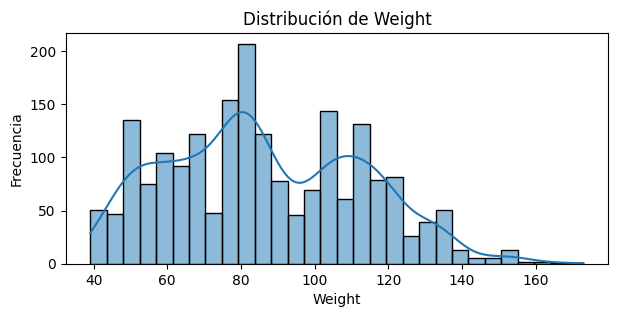

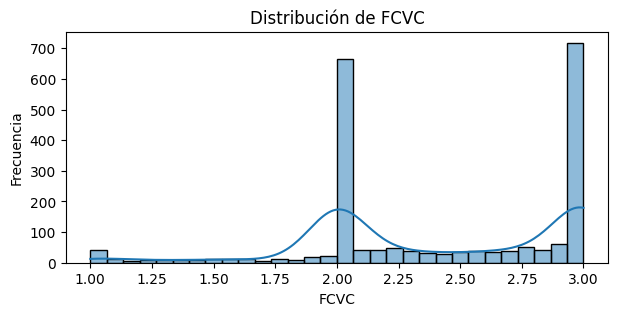

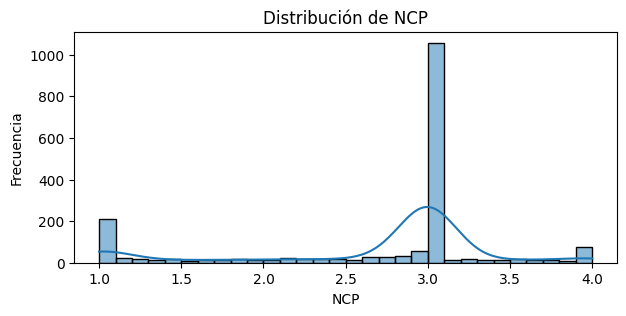

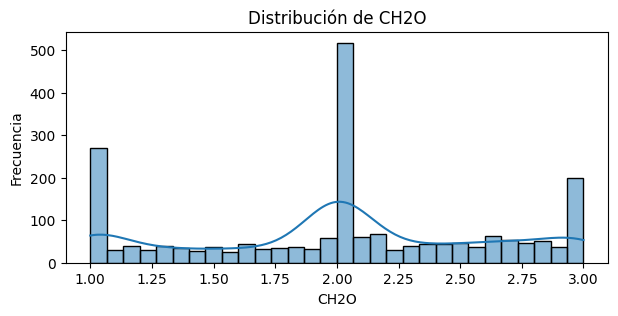

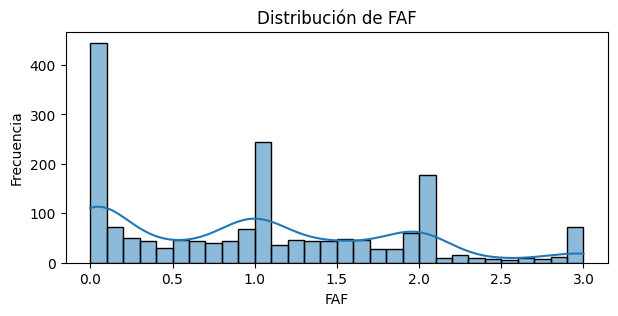

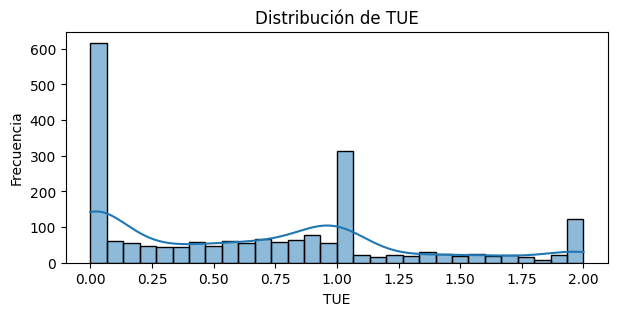

In [18]:
for col in col_numeric:
    # Crear una figura nueva para cada gráfica
    plt.figure(figsize=(7, 3))
    
    # Crear el histograma y gráfico de densidad
    sns.histplot(proyecto_dataset[col], kde=True, bins=30)
    
    # Título y etiquetas de los ejes
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    
    # Mostrar la gráfica
    plt.show()